### Why RFM?
- RFM (Recency, Frequency, Monetary) analysis is a marketing model using customer segmentation based on their transaction history.
- This model could be very useful, especially for small and medium-sized enterprises (SMEs) with limited marketing resources, helping them focus on the potentially right customer segments to increase ROI, reduce churn, reduce cost, improve customer relationship, and a lot more.

### How?
- In RFM analysis, customers are scored based on three factors (Recency - how recently, Frequency - how often, Monetary - how much), then labeled based on the combination of RFM scores.

### Reference:
- https://www.putler.com/rfm-analysis

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# need to install squarify first before importing
import squarify

In [2]:
ords = pd.read_excel('Dataset.xlsx')
ords.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [3]:
# Convert 5-digit format of date (if necessary)

# import xlrd
# Orders['Order Date'] = Orders['Order Date'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))
# Orders['Ship Date'] = Orders['Ship Date'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))

In [4]:
ords.info()
# null values (if any) are already removed or filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [5]:
# convert "Column Name" format into "column_name" format

ords.columns = [col.lower().replace(' ', '_') for col in ords.columns]

In [6]:
# calculate total value of each order

groupby_order = ords.groupby(['order_id', 'order_date', 'customer_id'], as_index=False)['sales'].sum()
groupby_order

,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [7]:
# load dataframe of returned orders

rtn = pd.read_excel('Dataset.xlsx', sheet_name='Return')
rtn.columns = [col.lower().replace(' ', '_') for col in rtn.columns]
rtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   returned  296 non-null    object
 1   order_id  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [8]:
# exclude returned orders

rtn_merge = groupby_order.merge(rtn, how='left', on='order_id')
valid = rtn_merge[~rtn_merge['order_id'].isin(rtn['order_id'])].drop('returned', axis=1)
valid

,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [9]:
today = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')

In [10]:
# calculate r value, f value, and m value for successful orders

rfm = valid.groupby('customer_id').agg({'order_date': 'max', 'order_id': 'count', 'sales': 'sum'}).reset_index()
rfm.columns = ['customer_id', 'max_date', 'frequency', 'monetary']
rfm['recency'] = (today - rfm['max_date']).dt.days
rfm = rfm.drop('max_date', axis=1)
rfm = rfm[['customer_id', 'recency', 'frequency', 'monetary']]
rfm

,customer_id,recency,frequency,monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [11]:
# calculate r score, f score, and m score

r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=r_labels)
rfm['f_score'] = pd.qcut(rfm['frequency'], q=5, labels=f_labels)
rfm['m_score'] = pd.qcut(rfm['monetary'], q=5, labels=m_labels)

In [12]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score'] = rfm['rfm_score'].astype(int)
rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112


In [13]:
# load dataframe of customer segmentation to each rfm_score

seg = pd.read_excel('Dataset.xlsx', sheet_name='Segmentation')
seg.columns = [col.lower().replace(' ', '_') for col in seg.columns]
seg

,segment,rfm_score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [14]:
# convert comma-separated string to a list of rfm scores

seg['rfm_score'] = seg['rfm_score'].str.split(',')
seg = seg.explode('rfm_score').reset_index(drop=True)
seg['rfm_score'] = seg['rfm_score'].astype(int)
seg.sort_values(by='rfm_score')
seg.head(10)

,segment,rfm_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [15]:
joined = rfm.merge(seg, how='left', on='rfm_score')
joined

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,5,4,5438.650,5,1,5,515,Promising
788,YS-21880,10,8,6720.444,5,4,5,545,Champions
789,ZC-21910,55,12,7892.998,4,5,5,455,Champions


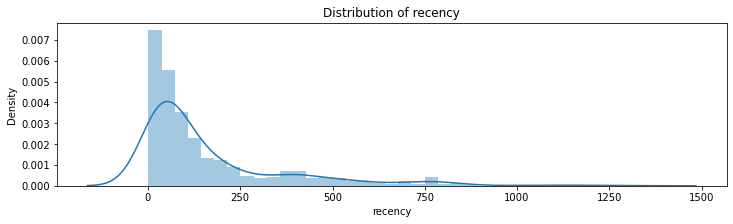

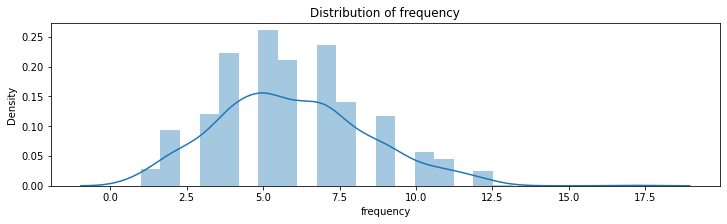

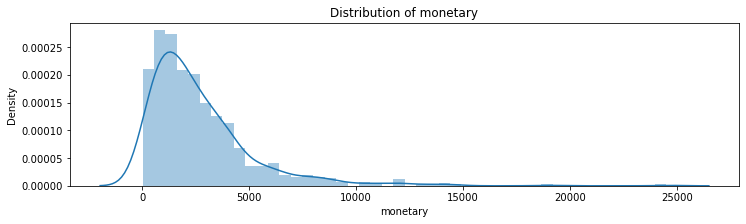

In [16]:
# show distribution of each variable of the model

colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(joined[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [17]:
grp = joined.groupby('segment').agg({'customer_id': 'count',
                                     'monetary': 'sum',
                                     'recency': 'mean'}).reset_index()
grp.columns = ['segment', 'cust_count', 'total_monetary', 'avg_recency']
grp.sort_values(by='cust_count', ascending=False, inplace=True)
grp

,segment,cust_count,total_monetary,avg_recency
9,Potential Loyalist,113,190944.9303,45.185841
1,At Risk,96,385996.8861,259.041667
4,Hibernating customers,90,109960.2510,190.044444
5,Lost customers,83,54264.2255,557.963855
7,Need Attention,72,259412.3922,50.138889
3,Champions,71,382096.5868,28.521127
10,Promising,63,224803.8955,35.253968
6,Loyal,62,270680.2154,60.725806
8,New Customers,61,40997.1410,41.475410
0,About To Sleep,44,47310.1172,135.204545


In [18]:
grp['count_share'] = grp['cust_count'] / grp['cust_count'].sum()
grp['monetary_share'] = grp['total_monetary'] / grp['total_monetary'].sum()
grp

,segment,cust_count,total_monetary,avg_recency,count_share,monetary_share
9,Potential Loyalist,113,190944.9303,45.185841,0.142857,0.090209
1,At Risk,96,385996.8861,259.041667,0.121365,0.182358
4,Hibernating customers,90,109960.2510,190.044444,0.113780,0.051949
5,Lost customers,83,54264.2255,557.963855,0.104930,0.025636
7,Need Attention,72,259412.3922,50.138889,0.091024,0.122555
3,Champions,71,382096.5868,28.521127,0.089760,0.180516
10,Promising,63,224803.8955,35.253968,0.079646,0.106205
6,Loyal,62,270680.2154,60.725806,0.078382,0.127879
8,New Customers,61,40997.1410,41.475410,0.077118,0.019368
0,About To Sleep,44,47310.1172,135.204545,0.055626,0.022351


### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| --- | --- | --- |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |

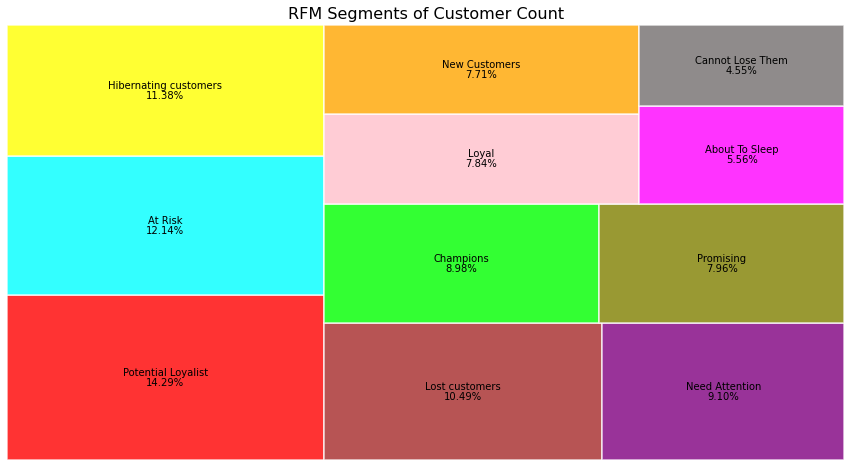

In [19]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['cust_count'], 
              label=grp['segment'],
              value=[f'{x*100:.2f}%' for x in grp['count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

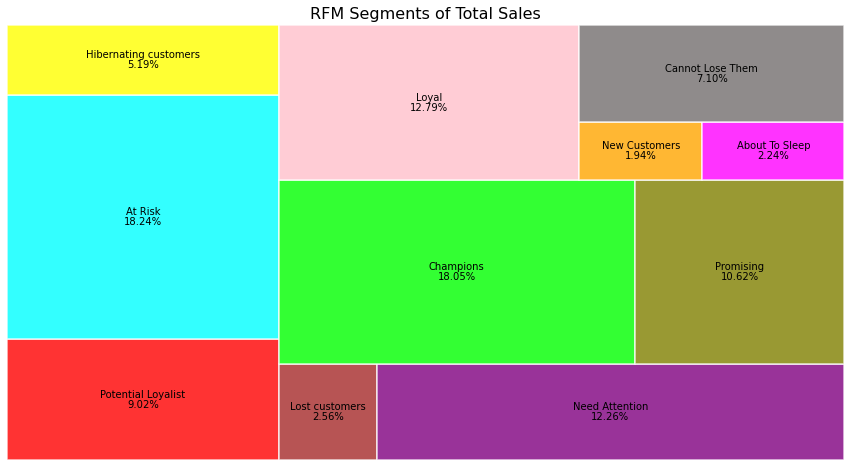

In [20]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['monetary_share'], 
              label=grp['segment'],
              value=[f'{x*100:.2f}%' for x in grp['monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()